In [4]:
import os
import logging
from collections import Counter

logging.basicConfig(level=logging.INFO)

def analyze_inbreast(base_path):
    """Специализированный анализ только INbreast датасета"""
    logging.info("\n=== INbreast Dataset Analysis ===")
    
    splits = ['train', 'valid', 'test']
    
    for split in splits:
        split_path = os.path.join(base_path, 'inbreast', split)
        if not os.path.exists(split_path):
            logging.warning(f"Split directory not found: {split_path}")
            continue
            
        logging.info(f"\nINbreast {split} split:")
        
        # Проверяем и подсчитываем изображения
        images_path = os.path.join(split_path, 'images')
        labels_path = os.path.join(split_path, 'labels')
        
        if not os.path.exists(images_path) or not os.path.exists(labels_path):
            logging.warning(f"Required directories not found in {split}")
            continue
        
        images = [f for f in os.listdir(images_path) if f.endswith(('.png', '.jpg', '.jpeg', '.dcm'))]
        labels = [f for f in os.listdir(labels_path) if f.endswith('.txt')]
        
        logging.info(f"Images directory: {images_path}")
        logging.info(f"Labels directory: {labels_path}")
        logging.info(f"Number of image files: {len(images)}")
        logging.info(f"Number of label files: {len(labels)}")
        
        # Детальный анализ меток
        class_dist = Counter()
        
        for label_file in labels:
            try:
                with open(os.path.join(labels_path, label_file), 'r') as f:
                    lines = f.readlines()
                    for line in lines:
                        if line.strip():
                            value = float(line.split()[0])
                            class_id = int(round(value))
                            class_dist[class_id] += 1
            except Exception as e:
                logging.error(f"Error reading {label_file}: {str(e)}")
        
        # Вывод статистики по классам
        total = sum(class_dist.values())
        if total > 0:
            logging.info("\nClass distribution:")
            for class_id, count in sorted(class_dist.items()):
                class_name = 'benign' if class_id == 0 else 'malignant' if class_id == 1 else 'normal'
                percentage = (count/total*100)
                logging.info(f"{class_name}: {count} ({percentage:.2f}%)")

if __name__ == "__main__":
    analyze_inbreast('data')

INFO:root:
=== INbreast Dataset Analysis ===
INFO:root:
INbreast train split:
INFO:root:Images directory: data\inbreast\train\images
INFO:root:Labels directory: data\inbreast\train\labels
INFO:root:Number of image files: 400
INFO:root:Number of label files: 118
INFO:root:
Class distribution:
INFO:root:benign: 118 (90.77%)
INFO:root:malignant: 11 (8.46%)
INFO:root:normal: 1 (0.77%)
INFO:root:
INbreast valid split:
INFO:root:Images directory: data\inbreast\valid\images
INFO:root:Labels directory: data\inbreast\valid\labels
INFO:root:Number of image files: 6
INFO:root:Number of label files: 6
INFO:root:
Class distribution:
INFO:root:benign: 6 (100.00%)
INFO:root:
INbreast test split:
INFO:root:Images directory: data\inbreast\test\images
INFO:root:Labels directory: data\inbreast\test\labels
INFO:root:Number of image files: 6
INFO:root:Number of label files: 6
INFO:root:
Class distribution:
INFO:root:benign: 6 (85.71%)
INFO:root:malignant: 1 (14.29%)


In [5]:
import os
import pandas as pd

# Путь к папкам
images_dir = "data/inbreast/train/images"
labels_dir = "data/inbreast/train/labels"

# Создаем список пар (изображение, метка)
dataset = []
for label_file in os.listdir(labels_dir):
    # Получаем имя изображения (убираем .txt)
    img_name = label_file.replace('.txt', '.jpg')
    
    # Читаем метку из файла
    with open(os.path.join(labels_dir, label_file), 'r') as f:
        label = f.read().strip()  # Предполагаем, что метка в первой строке
        
    dataset.append({
        'image_path': os.path.join(images_dir, img_name),
        'label': label
    })

# Создаем DataFrame для удобства
df = pd.DataFrame(dataset)

In [6]:
df 

,image_path,label
0,data/inbreast/train/images\20586908_jpg.rf.366...,0 0.95390625 0.2734375 0.09140625 0.096875\n1 ...
1,data/inbreast/train/images\20586934_jpg.rf.776...,0 0.065625 0.51875 0.1109375 0.0875
2,data/inbreast/train/images\20586934_jpg.rf.776...,0.0 0.518750011920929 0.934374988079071 0.0874...
3,data/inbreast/train/images\20586934_jpg.rf.776...,0.0 0.518750011920929 0.934374988079071 0.0874...
4,data/inbreast/train/images\20586934_jpg.rf.776...,0.0 0.06562499701976776 0.518750011920929 0.11...
...,...,...
113,data/inbreast/train/images\53581460_jpg.rf.2c0...,0 0.775 0.2765625 0.134375 0.0953125
114,data/inbreast/train/images\53582656_jpg.rf.3c5...,0 0.19609375 0.49296875 0.3921875 0.36640625
115,data/inbreast/train/images\53586869_jpg.rf.8ac...,0 0.4453125 0.75390625 0.103125 0.084375
116,data/inbreast/train/images\53586896_jpg.rf.c6e...,0 0.43359375 0.6609375 0.1234375 0.08125


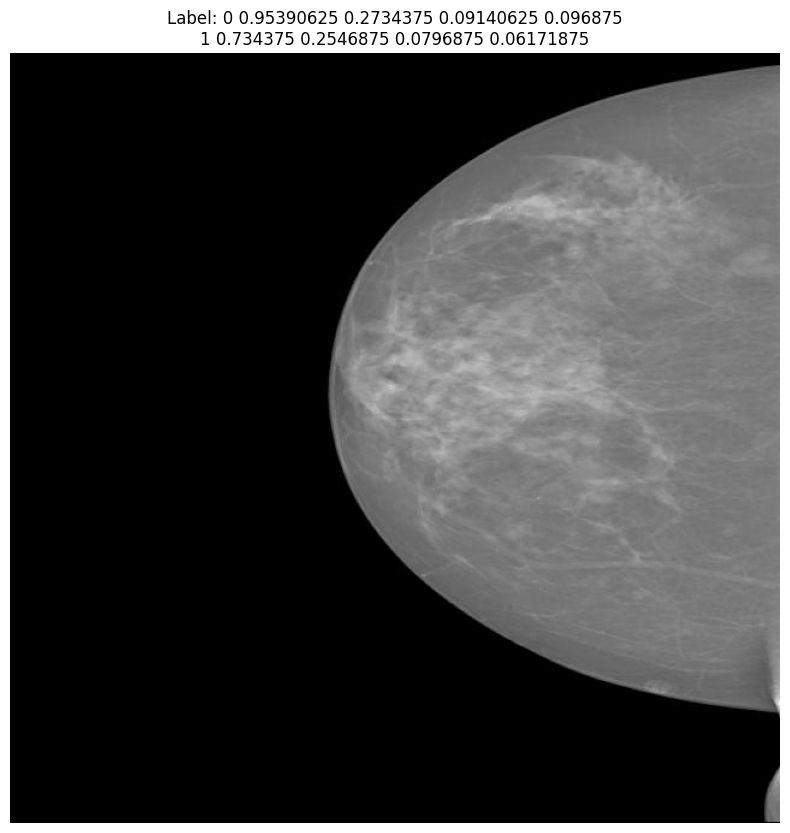

In [10]:
import cv2
import matplotlib.pyplot as plt
import os

# Пути к файлам
images_dir = "data/inbreast/train/images"
labels_dir = "data/inbreast/train/labels"

# Выбираем первый файл для примера
label_file = os.listdir(labels_dir)[0]
image_file = label_file.replace('.txt', '.jpg')

# Читаем изображение
img_path = os.path.join(images_dir, image_file)
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Читаем метку
with open(os.path.join(labels_dir, label_file), 'r') as f:
    label = f.read().strip()

# Отображаем
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

# Для просмотра нескольких изображений
def show_labeled_images(num_images=3):
    plt.figure(figsize=(15, 5))
    
    for i, label_file in enumerate(os.listdir(labels_dir)[:num_images]):
        image_file = label_file.replace('.txt', '.jpg')
        img_path = os.path.join(images_dir, image_file)
        
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            label = f.read().strip()
            
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()



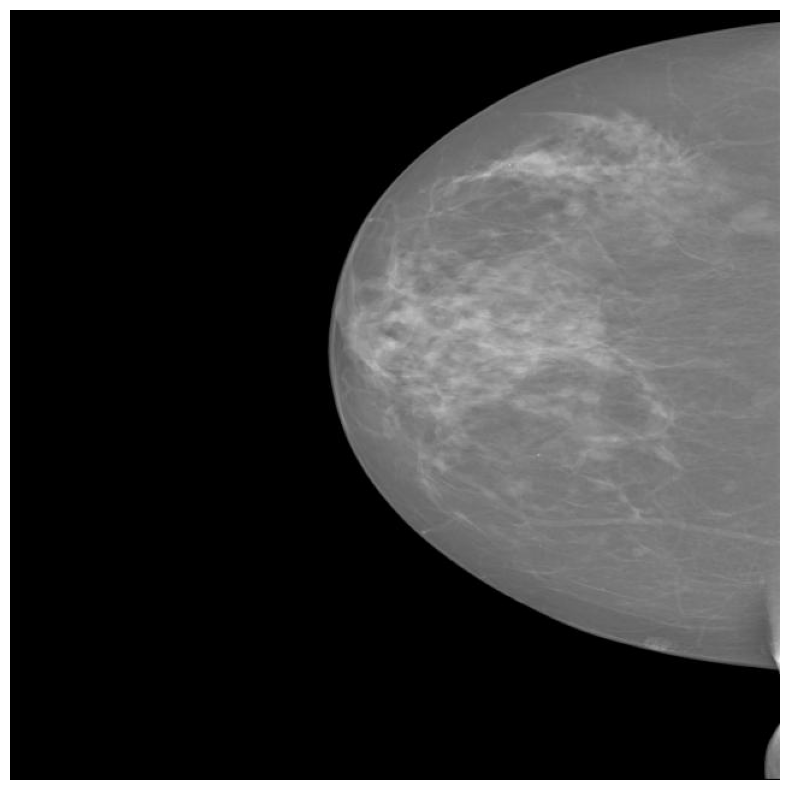

Путь к изображению: data/inbreast/train/images\20586908_jpg.rf.3666309de6d99e4f73f4e596e125acb5.jpg
Путь к метке: data/inbreast/train/labels\20586908_jpg.rf.3666309de6d99e4f73f4e596e125acb5.txt


In [13]:
import cv2
import matplotlib.pyplot as plt
import os

# Укажите правильные пути к вашим данным
images_dir = "data/inbreast/train/images"
labels_dir = "data/inbreast/train/labels"

# Выберем конкретный файл
label_files = os.listdir(labels_dir)
if label_files:  # Проверяем, что список не пустой
    label_file = label_files[0]
    image_file = label_file.replace('.txt', '.jpg')
    
    # Полные пути к файлам
    img_path = os.path.join(images_dir, image_file)
    label_path = os.path.join(labels_dir, label_file)
    
    # Проверяем существование файла
    if os.path.exists(img_path):
        # Читаем изображение
        image = cv2.imread(img_path)
        if image is not None:  # Проверяем успешность чтения
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Отображаем
            plt.figure(figsize=(10,10))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        else:
            print(f"Не удалось прочитать изображение: {img_path}")
    else:
        print(f"Файл не найден: {img_path}")
else:
    print("Папка с метками пуста")

# Выводим информацию о путях для отладки
print(f"Путь к изображению: {img_path}")
print(f"Путь к метке: {label_path}")

Размер изображения: 640x640
Прочитано боксов: 1
Бокс 0: class=0.0, center=(0.07, 0.52), size=(0.11, 0.09)


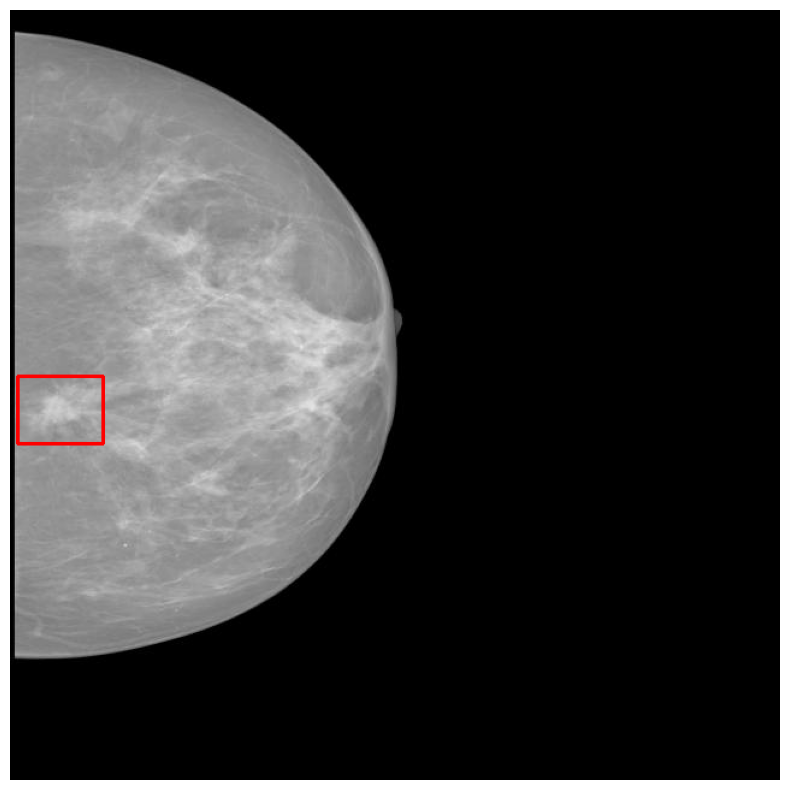

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_bbox(image_path, label_path):
    # Проверяем существование файлов
    if not os.path.exists(image_path):
        print(f"Ошибка: Изображение не найдено по пути {image_path}")
        return
    if not os.path.exists(label_path):
        print(f"Ошибка: Файл с метками не найден по пути {label_path}")
        return
        
    # Читаем изображение
    image = cv2.imread(image_path)
    if image is None:
        print(f"Ошибка: Не удалось прочитать изображение {image_path}")
        return
        
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    H, W = image.shape[:2]
    print(f"Размер изображения: {W}x{H}")
    
    # Читаем аннотации
    try:
        with open(label_path, 'r') as f:
            boxes = f.readlines()
        print(f"Прочитано боксов: {len(boxes)}")
    except Exception as e:
        print(f"Ошибка при чтении файла меток: {e}")
        return

    # Рисуем каждый bbox
    for i, box in enumerate(boxes):
        try:
            class_id, x_center, y_center, width, height = map(float, box.strip().split())
            print(f"Бокс {i}: class={class_id}, center=({x_center:.2f}, {y_center:.2f}), size=({width:.2f}, {height:.2f})")
            
            # Конвертируем координаты
            x = int(x_center * W)
            y = int(y_center * H)
            w = int(width * W)
            h = int(height * H)
            
            x1 = int(x - w/2)
            y1 = int(y - h/2)
            x2 = int(x + w/2)
            y2 = int(y + h/2)
            
            color = (255,0,0) if class_id == 0 else (0,255,0)
            cv2.rectangle(image, (x1,y1), (x2,y2), color, 2)
        except Exception as e:
            print(f"Ошибка при обработке бокса {i}: {e}")

    # Отображаем результат
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Пример использования
# Используем существующий файл из вашей директории
image_path = "data/inbreast/train/images/20586934_jpg.rf.7764ceded65222052e4779bc8151b481.jpg"
label_path = "data/inbreast/train/labels/20586934_jpg.rf.7764ceded65222052e4779bc8151b481.txt"
plot_bbox(image_path, label_path)